1. 1D convection-difussion equation
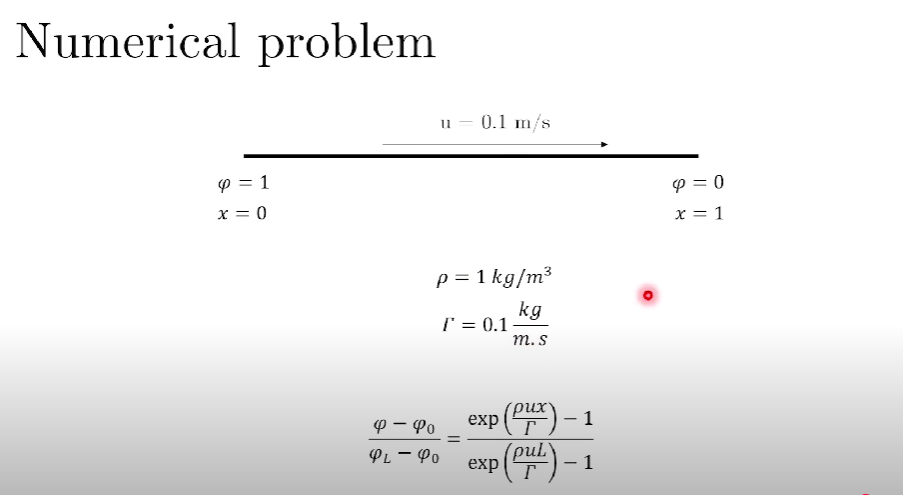

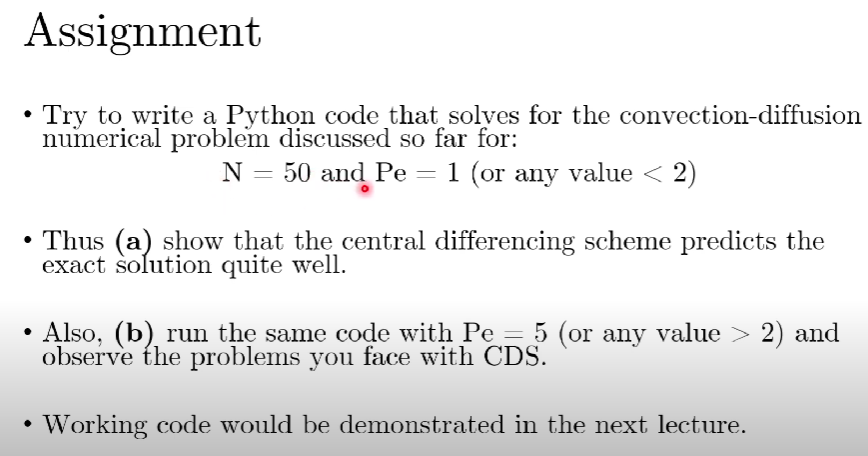

Peclet number:  -0.7999999999999999


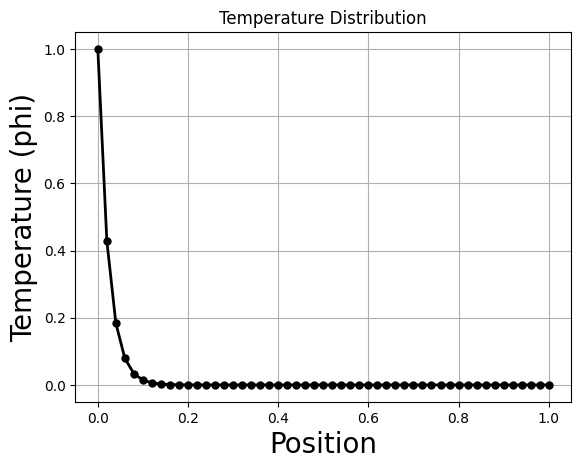

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#Initialize the parameters
L = 1.0
N = 51
h = np.float64(L/(N-1))
rho= np.float64(1) #kg/m^3
gamma = 0.1 #kg/m.s
u = np.float64(-4) #m/s
F = rho*u
D = gamma/h
iterations = 0

#peclet number
Pe = np.float64(F*h/gamma)
print("Peclet number: ", Pe)

#Boundary condition
phi = np.zeros(N)
phi[0] = 1
phi[N-1] = 0

#Iteration
phi_new = np.zeros(N)
phi_new[0] = 1
phi_new[N-1] = 0


numerical_error = np.float64(1)
epsilon = 1e-8

#plot for numerical error
#plt.figure(10)

while numerical_error > epsilon:

    for i in range(1,N-1):
        a_W =  D+ F/2
        a_E = D - F/2
        a_P = a_E + a_W
        phi_new[i] = (a_E*phi[i+1] + a_W*phi[i-1]) / (a_P)

    #resetting the numervval error and recalcualte
    numerical_error = 0
    for i in range(1, N-1):
        numerical_error += np.abs(phi_new[i] - phi[i])

    #iteraton and advancement
    iterations += 1
    phi = phi_new.copy()

    # Plotting numerical error
    # if iterations % 500 == 0:
    #     plt.figure(10)
    #     plt.semilogy(iterations, numerical_error, 'ko')
    #     plt.pause(0.01)

# Plotting the final temperature distribution
x_dom = np.arange(N) * h

plt.figure(11)
plt.plot(x_dom, phi, 'ko-', linewidth = 2, markersize =5)
plt.grid(True)
plt.title('Temperature Distribution')
plt.xlabel('Position', size = 20)
plt.ylabel('Temperature (phi)', size = 20)
plt.show()







Central differencing scheme runs into problem for peclect numer >2. So, Now we will introduce upwind scheme to address that issue.

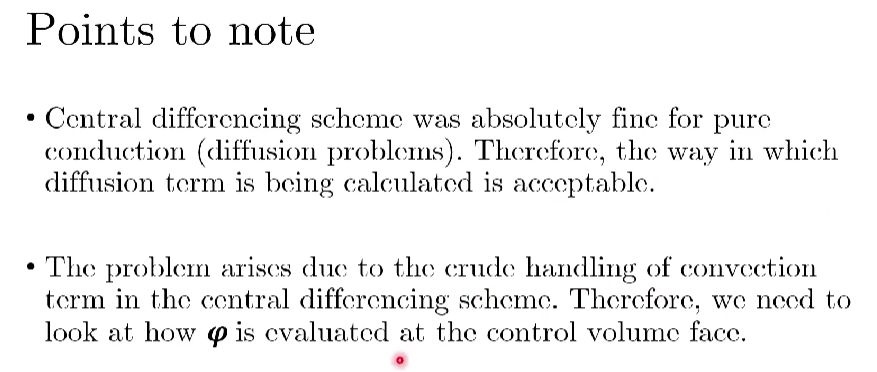